## Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Visualize Dataset
This is the same code from Assignment 1

In [3]:
import matplotlib.pyplot as plt

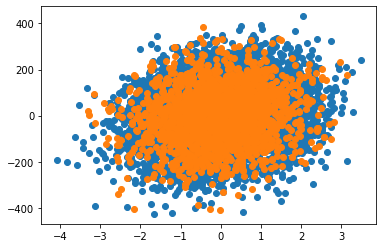

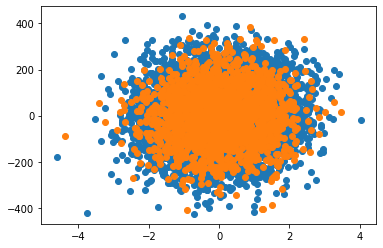

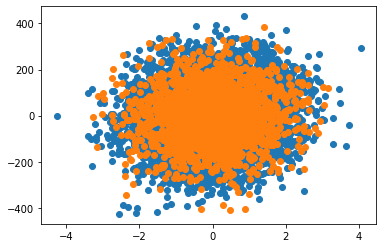

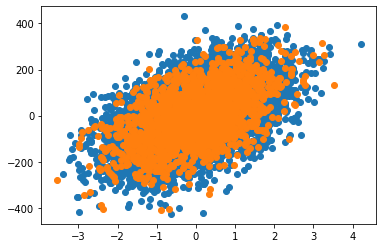

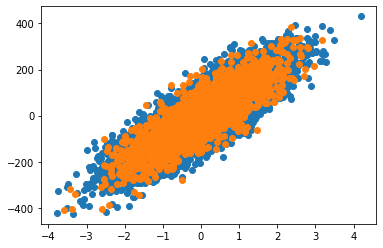

In [4]:
for i in range(5):
  plt.scatter(X_train[:,i], y_train)
  plt.scatter(X_test[:,i], y_test)
  plt.show()


## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [5]:
pip install -q seaborn

In [6]:
import seaborn as sns

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
    Dense(5, activation='relu', input_shape=(5,)),
    Dense(5, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mean_squared_error',optimizer = tf.keras.optimizers.SGD(0.001))

history =model.fit(X_train,y_train,epochs=50,validation_split = 0.2,verbose=2)

predictions = model.predict(X_test)

Epoch 1/50
200/200 - 1s - loss: 1443.8135 - val_loss: 85.2041 - 954ms/epoch - 5ms/step
Epoch 2/50
200/200 - 0s - loss: 202.4496 - val_loss: 35.1886 - 296ms/epoch - 1ms/step
Epoch 3/50
200/200 - 0s - loss: 374.6703 - val_loss: 27.3928 - 305ms/epoch - 2ms/step
Epoch 4/50
200/200 - 0s - loss: 257.8798 - val_loss: 1060.9968 - 303ms/epoch - 2ms/step
Epoch 5/50
200/200 - 0s - loss: 215.8679 - val_loss: 43.0550 - 345ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 155.6281 - val_loss: 2340.4211 - 358ms/epoch - 2ms/step
Epoch 7/50
200/200 - 0s - loss: 493.7722 - val_loss: 39.3092 - 303ms/epoch - 2ms/step
Epoch 8/50
200/200 - 0s - loss: 204.6093 - val_loss: 604.6605 - 291ms/epoch - 1ms/step
Epoch 9/50
200/200 - 0s - loss: 223.8487 - val_loss: 6931.1704 - 291ms/epoch - 1ms/step
Epoch 10/50
200/200 - 0s - loss: 400.9542 - val_loss: 54.8084 - 294ms/epoch - 1ms/step
Epoch 11/50
200/200 - 0s - loss: 149.7206 - val_loss: 1626.0511 - 287ms/epoch - 1ms/step
Epoch 12/50
200/200 - 0s - loss: 176.3626 

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

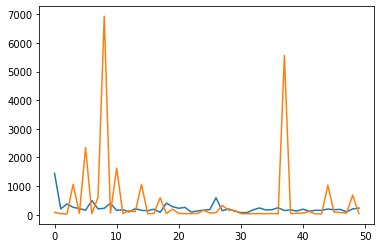

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

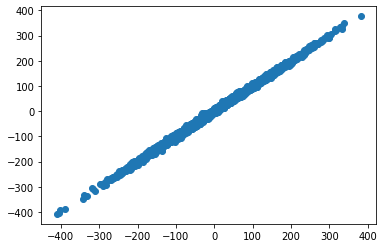

In [16]:
plt.scatter(y_test,predictions)

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [22]:
from sklearn.metrics import r2_score

In [24]:
#def r2_score(y_true, y_pred):
     # y_mean = y_true.mean()
     # return 1-(((y_true - y_pred)**2).mean())/(((y_true - y_mean)**2).mean())

accuracy = r2_score(y_test, predictions.flatten()) 
print("Accuracy:", accuracy)

Accuracy: 0.9975095333953556


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

In [17]:
#Input of shape 5 with Dense layer of shape - 10,15,1

custom_model = Sequential([
    Dense(10, activation='tanh', input_shape=(5,)),
    Dense(15, activation='tanh'),
    Dense(1)
])
custom_model.compile(
       optimizer=tf.optimizers.Adam(learning_rate=0.005),
       loss='mean_absolute_error')

custom_history = custom_model.fit(
    X_train,y_train,
    validation_split=0.2,
    verbose=2, epochs=50)

Epoch 1/50
200/200 - 1s - loss: 83.1881 - val_loss: 75.3355 - 801ms/epoch - 4ms/step
Epoch 2/50
200/200 - 0s - loss: 67.5815 - val_loss: 64.4397 - 336ms/epoch - 2ms/step
Epoch 3/50
200/200 - 0s - loss: 58.0446 - val_loss: 55.7950 - 346ms/epoch - 2ms/step
Epoch 4/50
200/200 - 0s - loss: 49.7668 - val_loss: 47.5652 - 327ms/epoch - 2ms/step
Epoch 5/50
200/200 - 0s - loss: 42.3113 - val_loss: 41.0114 - 338ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 36.4329 - val_loss: 35.6091 - 327ms/epoch - 2ms/step
Epoch 7/50
200/200 - 0s - loss: 31.5851 - val_loss: 31.3024 - 321ms/epoch - 2ms/step
Epoch 8/50
200/200 - 1s - loss: 27.5252 - val_loss: 27.3859 - 566ms/epoch - 3ms/step
Epoch 9/50
200/200 - 1s - loss: 24.2136 - val_loss: 24.1137 - 585ms/epoch - 3ms/step
Epoch 10/50
200/200 - 1s - loss: 21.3590 - val_loss: 21.5323 - 675ms/epoch - 3ms/step
Epoch 11/50
200/200 - 1s - loss: 19.0956 - val_loss: 19.1568 - 622ms/epoch - 3ms/step
Epoch 12/50
200/200 - 1s - loss: 17.2025 - val_loss: 17.3179 - 

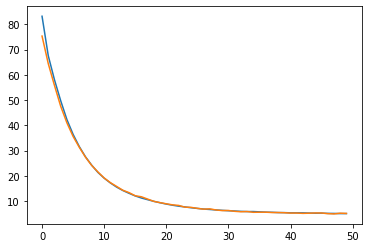

In [18]:
plt.plot(custom_history.history['loss'], label='loss')
plt.plot(custom_history.history['val_loss'], label='val_loss')

In [19]:
custom_predictions = custom_model.predict(X_test)

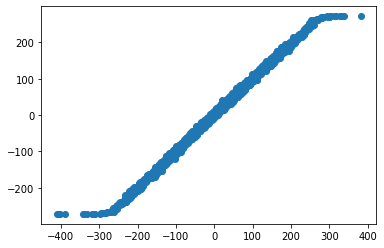

In [20]:
plt.scatter(y_test,custom_predictions)

In [25]:
r2_score(y_test,custom_predictions)

0.9930955005135249